# Feature Preprocessing
## EV Survey 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np
#------------------------
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
#-------------------------
from os import listdir
from os.path import isfile, join
import pprint
import os 
from pathlib import Path

Objective
* Evaluate feature relationships
* Evaluate statistical relationship strengths using Pearson or other method

In [2]:
def seabornhist(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.histplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

def seaborncount(size=(10,10), data=None, hue_c=None, x=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.countplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.show()
    return

In [3]:
#collect info about current working directory and the location of the raw data pickle files

wd = Path(os.getcwd())
parent_dir = wd.parent.absolute()

In [4]:
#Data for the EV survey
filename = "EDA_cleaned_data.pkl"
filepath = f"{wd}\\{filename}"
df = pd.read_pickle(filepath)

In [5]:
df.head()

,response_id,year_submitted_survey_2,months_owned,model_year,Make,Model,electric_range,ev_type,discontinuance,surveyed_age,...,reliability_satisfaction,range_satisfaction,charge_access_satisfaction,adas_satisfaction,household_income,home_charge_type,work_charge_type,highest_charge_used,backup_vehicle_mpg,finance_type
0,1.0,2019.0,24.0,2016,bmw,i3,81.0,phev,continued,25.0,...,5.0,5.0,5.0,5.0,"$150,000 to $199,999",no charging,no charging,level 2,25.0,1.0
6,7.0,2019.0,14.0,2016,fiat,500e,87.0,bev,continued,35.0,...,4.0,1.0,3.0,3.0,"$50,000 to $99,999",level 1,no charging,level 2,82.0,1.0
9,11.0,2019.0,48.0,2015,nissan,leaf,84.0,bev,discontinued,55.0,...,3.0,1.0,2.0,1.0,i prefer not to answer,level 1,no charging,no charging,24.0,1.0
10,12.0,2019.0,30.0,2015,bmw,i3,81.0,phev,continued,55.0,...,5.0,2.0,3.0,3.0,"$100,000 to $149,999",level 2,level 1,no charging,34.0,1.0
11,13.0,2019.0,31.0,2016,volkswagen,e-golf,84.0,bev,continued,35.0,...,5.0,2.0,4.0,2.0,"$150,000 to $199,999",level 1,level 1,level 1 & level 2,NaN,1.0


## Below this is the data preprocessing and modeling stage

### Prepare the categorical variables for modeling

Determine whether the catrgorical variables should be ordinally encoded or one hot encoded

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 4833
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   1947 non-null   float64
 1   year_submitted_survey_2       1947 non-null   float64
 2   months_owned                  1851 non-null   float64
 3   model_year                    1947 non-null   object 
 4   Make                          1947 non-null   object 
 5   Model                         1947 non-null   object 
 6   electric_range                1946 non-null   float64
 7   ev_type                       1946 non-null   object 
 8   discontinuance                1947 non-null   object 
 9   surveyed_age                  1872 non-null   float64
 10  surveyed_gender               1899 non-null   object 
 11  dist_1                        1615 non-null   float64
 12  trips_greater_200             1947 non-null   float64
 13  saf

### Fill in the nan values with reasonable estimates

In [7]:
""" df.work_charge_type.mode()[0]
print(df.work_charge_type.value_counts())
df.fillna(value = {
                   'work_charge_type' : df.work_charge_type.mode()[0],
   
                   },
                    inplace= True)
                    """

" df.work_charge_type.mode()[0]\nprint(df.work_charge_type.value_counts())\ndf.fillna(value = {\n                   'work_charge_type' : df.work_charge_type.mode()[0],\n   \n                   },\n                    inplace= True)\n                    "

In [8]:
print(df.work_charge_type.value_counts())

no charging    571
level 2        346
level 1        191
dc fast         13
Name: work_charge_type, dtype: int64


In [9]:
df.fillna(value = {'months_owned' : df.months_owned.mean(),
                   'electric_range' : df.electric_range.mean(),
                   'ev_type' : df.ev_type.mode()[0],
                   'surveyed_age' : df.surveyed_age.mean(),
                   'surveyed_gender' : df.surveyed_gender.mode()[0],
                   'dist_1' : df.dist_1.mode()[0],
                   'safety_satisfaction': df.safety_satisfaction.mode()[0],
                   'comfort_satisfaction': df.comfort_satisfaction.mode()[0],
                   'refuel_recharge_satisfaction': df.refuel_recharge_satisfaction.mode()[0],
                   'performance_satisfaction' : df.performance_satisfaction.mode()[0],
                   'env_impact_satisfaction' : df.env_impact_satisfaction.mode()[0],
                   'purch_price_satisfaction' : df.purch_price_satisfaction.mode()[0],
                   'reliability_satisfaction' : df.reliability_satisfaction.mode()[0],
                   'range_satisfaction' : df.range_satisfaction.mode()[0],
                   'charge_access_satisfaction': df.charge_access_satisfaction.mode()[0],
                   'adas_satisfaction' : df.adas_satisfaction.mode()[0],
                   'household_income' : df.household_income.mode()[0],
                   'work_charge_type' : df.work_charge_type.mode()[0],
                   'backup_vehicle_mpg' : df.backup_vehicle_mpg.mean(),
                   'highest_charge_used' : df.highest_charge_used.mode()[0],
                   },
                    inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 4833
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   1947 non-null   float64
 1   year_submitted_survey_2       1947 non-null   float64
 2   months_owned                  1947 non-null   float64
 3   model_year                    1947 non-null   object 
 4   Make                          1947 non-null   object 
 5   Model                         1947 non-null   object 
 6   electric_range                1947 non-null   float64
 7   ev_type                       1947 non-null   object 
 8   discontinuance                1947 non-null   object 
 9   surveyed_age                  1947 non-null   float64
 10  surveyed_gender               1947 non-null   object 
 11  dist_1                        1947 non-null   float64
 12  trips_greater_200             1947 non-null   float64
 13  saf

In [11]:
df.work_charge_type.value_counts()

no charging    1397
level 2         346
level 1         191
dc fast          13
Name: work_charge_type, dtype: int64

In [12]:
print(df.household_income.value_counts())
print(df.household_income.unique())

$150,000 to $199,999      538
$100,000 to $149,999      312
i prefer not to answer    256
$200,000 to $249,999      196
$50,000 to $99,999        178
$250,000 to $299,999      127
$500,000 or more          120
$300,000 to $349,999       76
$350,000 to $399,999       54
less than $50,000          40
$400,000 to $449,999       29
$450,000 to $499,999       21
Name: household_income, dtype: int64
['$150,000 to $199,999' '$50,000 to $99,999' 'i prefer not to answer'
 '$100,000 to $149,999' '$350,000 to $399,999' '$500,000 or more'
 '$250,000 to $299,999' '$300,000 to $349,999' 'less than $50,000'
 '$200,000 to $249,999' '$400,000 to $449,999' '$450,000 to $499,999']


In [13]:
df.home_charge_type.value_counts()

level 2        882
level 1        749
no charging    316
Name: home_charge_type, dtype: int64

In [14]:
#Oridinally encode the home charge type
home_charge_ids = ['no charging', 'level 1', 'level 2' ]
encoder = OrdinalEncoder(categories=[home_charge_ids])
df2 = df['home_charge_type']
df2.head()
df3 = encoder.fit_transform(df2.values.reshape(-1,1))
df3.shape
type(df3)
df4 = pd.DataFrame(df3, columns = ['home_charge_type'])
print(df4.value_counts())
df4.head()
df['home_charge_type'] = df4.values

home_charge_type
2.0                 882
1.0                 749
0.0                 316
dtype: int64


In [15]:
df.home_charge_type.value_counts()

2.0    882
1.0    749
0.0    316
Name: home_charge_type, dtype: int64

In [16]:
#Oridinally encode the work charge type
work_charge_ids = ['no charging', 'level 1', 'level 2', 'dc fast']
encoder = OrdinalEncoder(categories=[work_charge_ids])
df2 = df['work_charge_type']
df2.head()
df3 = encoder.fit_transform(df2.values.reshape(-1,1))
print(df3.shape)
type(df3)
df4 = pd.DataFrame(df3, columns = ['work_charge_type'])
df4.head()
df['work_charge_type'] = df4.values

(1947, 1)


In [17]:
print(df4.shape)
df.work_charge_type.value_counts()

(1947, 1)


0.0    1397
2.0     346
1.0     191
3.0      13
Name: work_charge_type, dtype: int64

In [18]:
#Oridinally encode the income level
income_ids = ['i prefer not to answer','less than $50,000', '$50,000 to $99,999',
             '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $249,999',
             '$250,000 to $299,999', '$300,000 to $349,999', '$350,000 to $399,999',
             '$400,000 to $449,999', '$450,000 to $499,999', '$500,000 or more']
encoder = OrdinalEncoder(categories=[income_ids])
df2 = df['household_income']
df2.head()
df3 = encoder.fit_transform(df2.values.reshape(-1,1))
df3.shape
type(df3)
df4 = pd.DataFrame(df3, columns = ['household_income'])
df4.head()
df['household_income'] = df4.values


In [19]:
df.household_income.value_counts()

4.0     538
3.0     312
0.0     256
5.0     196
2.0     178
6.0     127
11.0    120
7.0      76
8.0      54
1.0      40
9.0      29
10.0     21
Name: household_income, dtype: int64

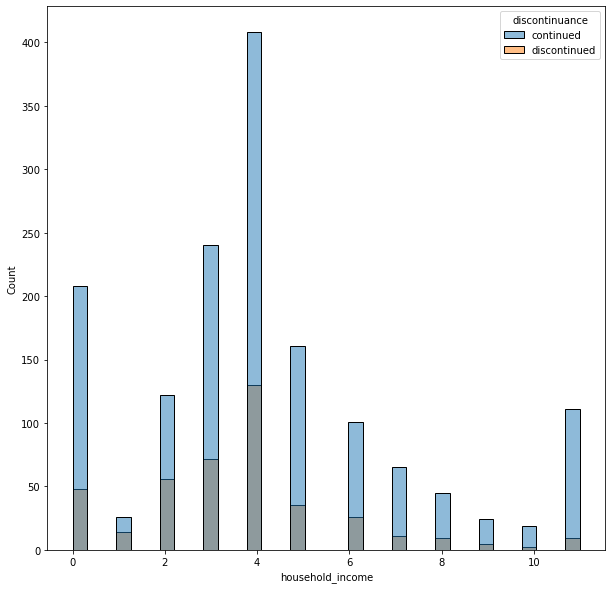

In [31]:
seabornhist(size=(10,10), data=df, hue_c ='discontinuance', x='household_income')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 4833
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   response_id                   1947 non-null   float64
 1   year_submitted_survey_2       1947 non-null   float64
 2   months_owned                  1947 non-null   float64
 3   model_year                    1947 non-null   object 
 4   Make                          1947 non-null   object 
 5   Model                         1947 non-null   object 
 6   electric_range                1947 non-null   float64
 7   ev_type                       1947 non-null   object 
 8   discontinuance                1947 non-null   object 
 9   surveyed_age                  1947 non-null   float64
 10  surveyed_gender               1947 non-null   object 
 11  dist_1                        1947 non-null   float64
 12  trips_greater_200             1947 non-null   float64
 13  saf

### One Hot Encode the non ordinal categorical variables

In [21]:
one_hot_columns = ['model_year', 'Make', 'Model', 'ev_type', 'highest_charge_used', 'surveyed_gender' ]


In [22]:
df.head()
df = pd.get_dummies(df,columns=one_hot_columns)


In [23]:
df.head()

,response_id,year_submitted_survey_2,months_owned,electric_range,discontinuance,surveyed_age,dist_1,trips_greater_200,safety_satisfaction,comfort_satisfaction,...,highest_charge_used_level 1 & level 2,"highest_charge_used_level 1, level 2 & dc fast",highest_charge_used_level 2,highest_charge_used_level 2 & dc fast,highest_charge_used_no charging,surveyed_gender_decline to state,surveyed_gender_female,surveyed_gender_genderqueer/non-binary,surveyed_gender_male,surveyed_gender_transfemale/transwoman
0,1.0,2019.0,24.0,81.0,continued,25.0,13.92,0.0,5.0,5.0,...,0,0,1,0,0,0,0,0,1,0
6,7.0,2019.0,14.0,87.0,continued,35.0,8.54,0.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0
9,11.0,2019.0,48.0,84.0,discontinued,55.0,12.91,0.0,3.0,2.0,...,0,0,0,0,1,0,0,0,1,0
10,12.0,2019.0,30.0,81.0,continued,55.0,9.43,0.0,4.0,4.0,...,0,0,0,0,1,0,0,0,1,0
11,13.0,2019.0,31.0,84.0,continued,35.0,16.32,0.0,5.0,5.0,...,1,0,0,0,0,0,0,0,1,0


In [24]:
df.head()

,response_id,year_submitted_survey_2,months_owned,electric_range,discontinuance,surveyed_age,dist_1,trips_greater_200,safety_satisfaction,comfort_satisfaction,...,highest_charge_used_level 1 & level 2,"highest_charge_used_level 1, level 2 & dc fast",highest_charge_used_level 2,highest_charge_used_level 2 & dc fast,highest_charge_used_no charging,surveyed_gender_decline to state,surveyed_gender_female,surveyed_gender_genderqueer/non-binary,surveyed_gender_male,surveyed_gender_transfemale/transwoman
0,1.0,2019.0,24.0,81.0,continued,25.0,13.92,0.0,5.0,5.0,...,0,0,1,0,0,0,0,0,1,0
6,7.0,2019.0,14.0,87.0,continued,35.0,8.54,0.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0
9,11.0,2019.0,48.0,84.0,discontinued,55.0,12.91,0.0,3.0,2.0,...,0,0,0,0,1,0,0,0,1,0
10,12.0,2019.0,30.0,81.0,continued,55.0,9.43,0.0,4.0,4.0,...,0,0,0,0,1,0,0,0,1,0
11,13.0,2019.0,31.0,84.0,continued,35.0,16.32,0.0,5.0,5.0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
"""I think you need o ectrct the cvolumns to ordinal encode aas a subset, they apply the mapping and joun it back in

ordinal_dict.items()

ordinal_dict = {}
ordinal_dict['home_charge_type'] = ['no charging', 'level 1', 'level 2' ]
for key, value in ordinal_dict.items():
    encoder = OrdinalEncoder(categories=values)
    print(df[f'{key}'].values.reshape(-1,1))
    #print(df[f'{key}'].values.reshape(-1,1))
    df[f'{key}'] = encoder.fit_transform(df[f'{key}'].values.reshape(-1,1))
    #encoder.fit_transform(df[f'{key}'])
    print(encoder)
    
print(ordinal_enc_dict['household_income'].categories_, '\n')
print(ordinal_enc_dict['home_charge_type'].categories_, '\n')
print(ordinal_enc_dict['work_charge_type'].categories_, '\n')
print(ordinal_enc_dict['highest_charge_used'].categories_, '\n')
"""

"I think you need o ectrct the cvolumns to ordinal encode aas a subset, they apply the mapping and joun it back in\n\nordinal_dict.items()\n\nordinal_dict = {}\nordinal_dict['home_charge_type'] = ['no charging', 'level 1', 'level 2' ]\nfor key, value in ordinal_dict.items():\n    encoder = OrdinalEncoder(categories=values)\n    print(df[f'{key}'].values.reshape(-1,1))\n    #print(df[f'{key}'].values.reshape(-1,1))\n    df[f'{key}'] = encoder.fit_transform(df[f'{key}'].values.reshape(-1,1))\n    #encoder.fit_transform(df[f'{key}'])\n    print(encoder)\n    \nprint(ordinal_enc_dict['household_income'].categories_, '\n')\nprint(ordinal_enc_dict['home_charge_type'].categories_, '\n')\nprint(ordinal_enc_dict['work_charge_type'].categories_, '\n')\nprint(ordinal_enc_dict['highest_charge_used'].categories_, '\n')\n"

In [26]:
"""
ordinal_enc_dict = {}

for col_name in ordinal:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = df[col_name]
    #print(ordinal_enc_dict)
    #print(col.head())
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
    
df.head()
print(*ordinal_enc_dict.items(), sep='\n')
"""

"\nordinal_enc_dict = {}\n\nfor col_name in ordinal:\n    # Create Ordinal encoder for col\n    ordinal_enc_dict[col_name] = OrdinalEncoder()\n    col = df[col_name]\n    #print(ordinal_enc_dict)\n    #print(col.head())\n    col_not_null = col[col.notnull()]\n    reshaped_vals = col_not_null.values.reshape(-1, 1)\n    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)\n    df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)\n    \ndf.head()\nprint(*ordinal_enc_dict.items(), sep='\n')\n"

### Remove columns that don't add value like the year submitted

In [27]:
df.drop(columns=['year_submitted_survey_2'], inplace=True)
#to prevent data leakage, also drop the response_id
#df.drop(columns=['year_submitted_survey_2', 'response_id'], inplace=True)

In [28]:
df.columns.to_list()

['response_id',
 'months_owned',
 'electric_range',
 'discontinuance',
 'surveyed_age',
 'dist_1',
 'trips_greater_200',
 'safety_satisfaction',
 'comfort_satisfaction',
 'refuel_recharge_satisfaction',
 'performance_satisfaction',
 'env_impact_satisfaction',
 'purch_price_satisfaction',
 'reliability_satisfaction',
 'range_satisfaction',
 'charge_access_satisfaction',
 'adas_satisfaction',
 'household_income',
 'home_charge_type',
 'work_charge_type',
 'backup_vehicle_mpg',
 'finance_type',
 'model_year_1915',
 'model_year_2001',
 'model_year_2011',
 'model_year_2012',
 'model_year_2013',
 'model_year_2014',
 'model_year_2015',
 'model_year_2016',
 'model_year_2017',
 'model_year_2018',
 'Make_',
 'Make_audi',
 'Make_bmw',
 'Make_cadillac',
 'Make_chevrolet',
 'Make_chevy',
 'Make_fiat',
 'Make_ford',
 'Make_honda',
 'Make_hyundai',
 'Make_kia',
 'Make_mercedes-benz',
 'Make_mitsubishi',
 'Make_nissan',
 'Make_smart',
 'Make_tesla',
 'Make_toyota',
 'Make_volkswagen',
 'Make_volkswago

## Save the data to an output to be used in the modeling stage, final scaling and adjustment should be done in the model notebook

In [29]:
df.to_pickle("processed_data.pkl")